# Lowpass Filter


In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Simple lowpass filter

ref. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lti.html 

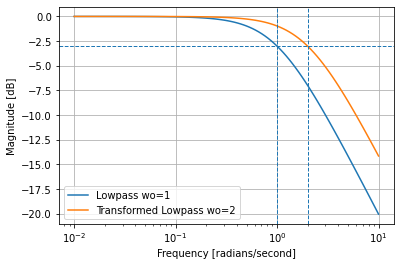

In [3]:
from scipy import signal
import matplotlib.pyplot as plt

# Define the transfer function of the filter  
# H(s) = 1/(s+1)
lp = signal.lti([1.0], [1.0, 1.0])
# Transform the filter to a lowpass filter with wo(=a cutoff frequency) of 2 rad/s
lp2 = signal.lti(*signal.lp2lp(lp.num, lp.den, wo=2))

w, mag_lp, p_lp = lp.bode()
w, mag_lp2, p_lp2 = lp2.bode(w)

plt.plot(w, mag_lp, label='Lowpass wo=1')
plt.plot(w, mag_lp2, label='Transformed Lowpass wo=2')
plt.semilogx()
plt.grid(True)
plt.xlabel('Frequency [radians/second]')
plt.ylabel('Magnitude [dB]')

# H(s)[dB] = 20*log10(|H(s)|)
# When reaching wo(=a cutoff frequency), H(s)[dB] = -3.01dB
plt.axhline(-3.01, ls='--', lw=1.)
plt.axvline(1, ls='--', lw=1.)
plt.axvline(2, ls='--', lw=1.)

plt.legend()

### Filter application

ref. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lsim.html#scipy.signal.lsim

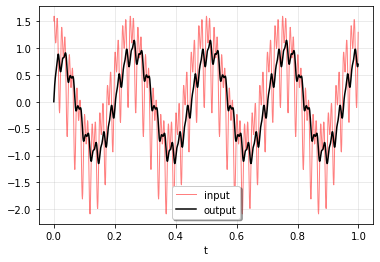

In [4]:
# Define the transfer function of the filter  
# H(s) = 1/(s+1) with a cutoff frequency of 2π*12 rad/sec
lp40 = signal.lti(*signal.lp2lp([1.0], [1.0, 1.0], wo=2*np.pi*12))

# Simulate the filter response to a step input
t = np.linspace(0, 1, 1000, endpoint=False)
# frequency of 2π*4, 2π*40, 2π*80 rad/s
u = (np.cos(2*np.pi*4*t) + 0.6*np.sin(2*np.pi*40*t) + 0.5*np.cos(2*np.pi*80*t))

tout, yout, xout = signal.lsim(lp40, U=u, T=t)

plt.plot(t, u, 'r', alpha=0.5, linewidth=1, label='input')
plt.plot(tout, yout, 'k', linewidth=1.5, label='output')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

## Butterworth filter

ref. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html#scipy.signal.butter

### Analog Filter

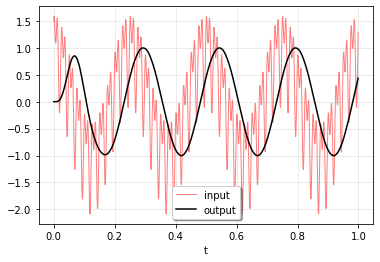

In [6]:
fs = 1000
b, a = signal.butter(N=5, Wn=2*np.pi*12, btype='lowpass', output='ba', analog=True)

t = np.linspace(0, 1, fs, endpoint=False)
u = (np.cos(2*np.pi*4*t) + 0.6*np.sin(2*np.pi*40*t) + 0.5*np.cos(2*np.pi*80*t))

tout, yout, xout = signal.lsim((b, a), U=u, T=t) 

plt.plot(t, u, 'r', alpha=0.5, linewidth=1, label='input')
plt.plot(tout, yout, 'k', linewidth=1.5, label='output')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

### Digital Filter

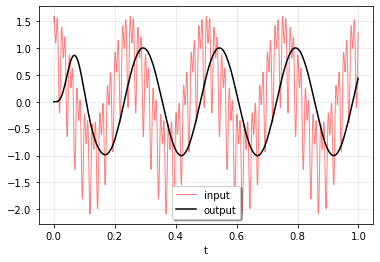

In [27]:
fs = 1000
b, a = signal.butter(N=5, Wn=12, btype='lowpass', output='ba', fs=fs)

t = np.linspace(0, 1, fs, endpoint=False)
u = (np.cos(2*np.pi*4*t) + 0.6*np.sin(2*np.pi*40*t) + 0.5*np.cos(2*np.pi*80*t))

tout, yout = signal.dlsim((b, a, 1/fs), u, t=t) 

plt.plot(t, u, 'r', alpha=0.5, linewidth=1, label='input')
plt.plot(tout, yout, 'k', linewidth=1.5, label='output')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

### Second-Order Sections

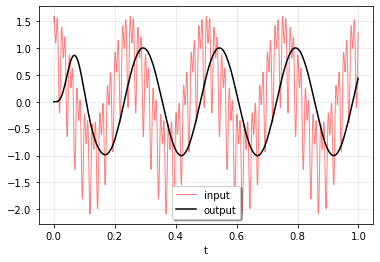

In [28]:
fs = 1000
sos = signal.butter(N=5, Wn=12, fs=fs, btype='lowpass', output='sos')

t = np.linspace(0, 1, fs, endpoint=False)
sig = (np.cos(2*np.pi*4*t) + 0.6*np.sin(2*np.pi*40*t) + 0.5*np.cos(2*np.pi*80*t))

sig_filtered = signal.sosfilt(sos, sig)

plt.plot(t, sig, 'r', alpha=0.5, linewidth=1, label='input')
plt.plot(t, sig_filtered, 'k', linewidth=1.5, label='output')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

The higher N, the better the performance of the filter tuple edge.

CAUTION: If the transfer function form [b, a] is requested, numerical problems can occur since the conversion between roots and the polynomial coefficients is a numerically sensitive operation, even for N >= 4. It is recommended to work with the SOS representation.

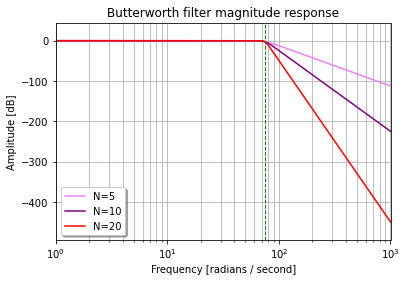

In [7]:
wo = 2*np.pi*12
N = [5, 10, 20]
colors = ['violet', 'purple', 'red']
for n, color in zip(N, colors):
    b, a = signal.butter(N=n, Wn=wo, btype='lowpass', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(np.abs(h)), color=color, label='N='+str(n))

plt.title('Butterworth filter magnitude response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(wo, color='green', ls='--', lw=1.)
plt.show()

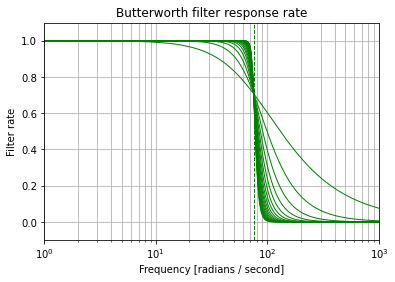

In [8]:
wo = 2*np.pi*12

for n in range(1,20,1):
    b, a = signal.butter(N=n, Wn=wo, btype='lowpass', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, np.abs(h), color="green", lw=1.)

plt.title('Butterworth filter response rate')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Filter rate')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(wo, color='green', ls='--', lw=1.)
plt.show()